In [1]:
import pandas as pd
import requests
import time
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'}


In [2]:
#生成出生当年所有日期
def dateRange(a,b):
    fmt = '%Y-%m-%d'
    bgn = int(time.mktime(time.strptime(a,fmt)))
    end = int(time.mktime(time.strptime(b,fmt)))
    list_date = [time.strftime(fmt,time.localtime(i)) for i in range(bgn,end+1,3600*24)]
    return list_date

def get_json(url):
    try:
        response = requests.get(url,headers=headers)
        if response.status_code == 200:
            json_text=response.json()
            return json_text
    except Exception:
        print('此页有问题！')
        return None


def get_comments(url):
    doc = get_json(url)
    dic = {}
    dic['pigprice'] = doc['pigprice']
    dic['pig_in'] = doc['pig_in']
    dic['pig_local'] = doc['pig_local']
    dic['maizeprice'] = doc['maizeprice']
    dic['bean'] = doc['bean']
    a = '-'.join(doc['time'][3])
    b = time.strftime('%Y-%m-%d',time.localtime(time.time()))
    print(dateRange(a,b))
    dic['time'] = dateRange(a,b)
    return pd.DataFrame(dic)

data =get_comments('http://zhujia.zhuwang.cc/index/api/chartData?areaId=-1&aa=1571997555296')

['2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21', '2019

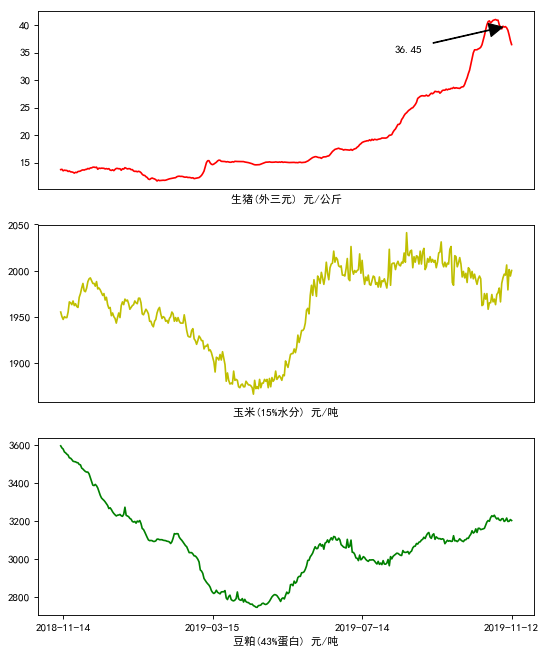

In [6]:
#作图
from pylab import mpl
import  matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus']

plt.figure(figsize=(8,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(311)
plt.plot(data['time'],data['pigprice'], color="r",linestyle = "-")
plt.xticks([])
plt.annotate(data['pigprice'][365], xy=(data['time'][365], 40), xytext=(data['time'][270], 35), arrowprops=dict(facecolor='black', shrink=0.1, width=0.5))
plt.xlabel("生猪(外三元) 元/公斤")

ax2 = plt.subplot(312)
plt.plot(data['time'],data['maizeprice'],color="y",linestyle = "-")
plt.xticks([])
plt.xlabel("玉米(15%水分) 元/吨")

ax3 = plt.subplot(313)
plt.plot(data['time'],data['bean'],color="g",linestyle = "-")
plt.xlabel("豆粕(43%蛋白) 元/吨")
plt.xticks(data['time'][2::121], rotation=0)
plt.show()